In [2]:
# 0) importing useful libraries
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, ParameterGrid, KFold
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# 1) loading wine dataset
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]
df = pd.DataFrame(X, columns=feature_names)
df = df.assign(label=pd.Series(y))
n_samples = len(df)
labels_count = df.groupby("label").size()
# class 0 -> 59 samples
# class 1 -> 71 samples
# class 2 -> 48 samples

In [4]:
# 2) create a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

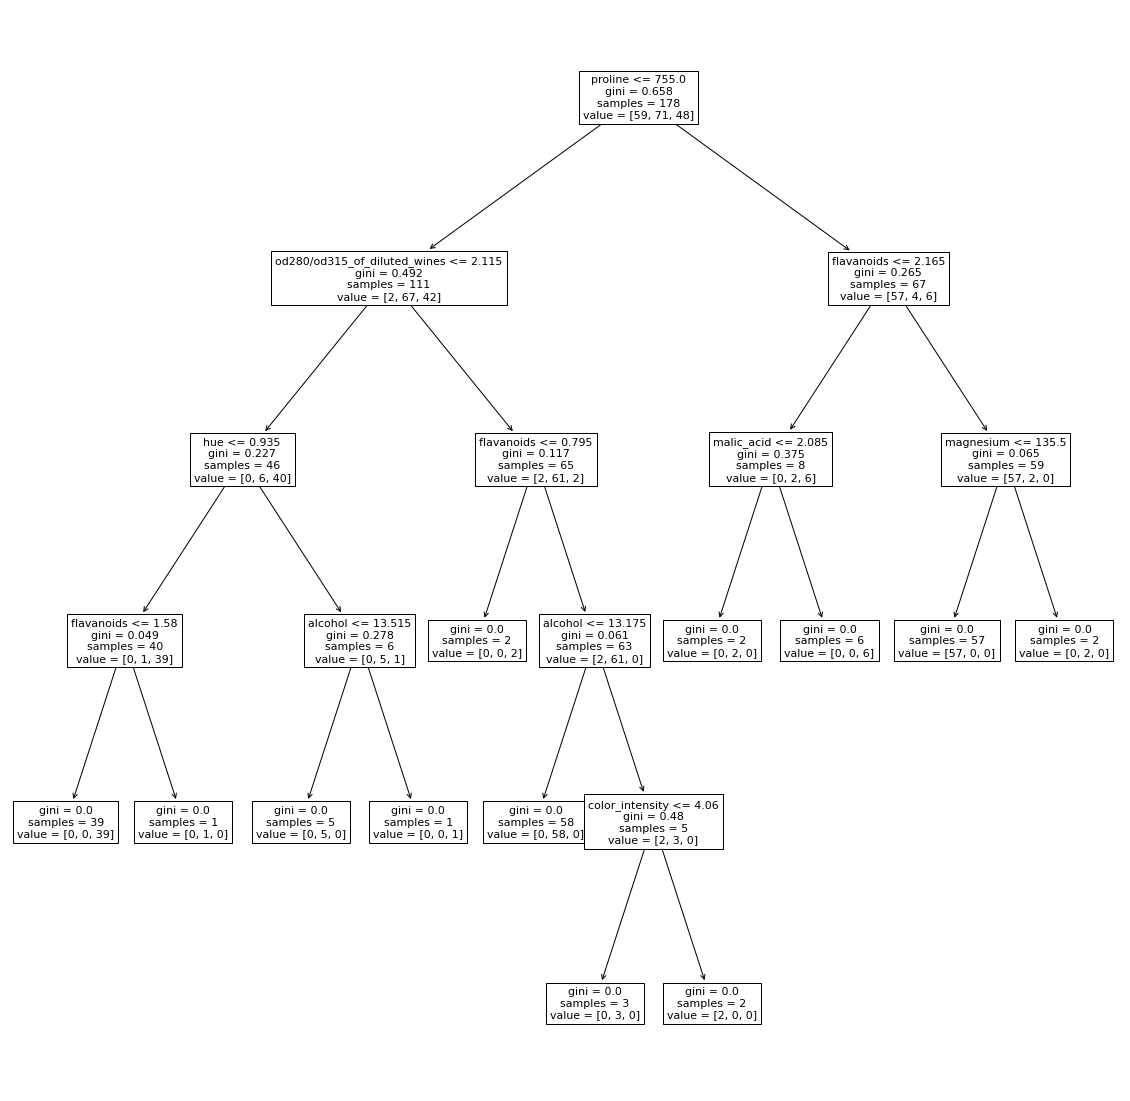

In [5]:
# 3) tree visualization
plt.figure(figsize=(20,20))
tmp=plot_tree(model, feature_names=feature_names, fontsize=11)

In [6]:
# 4) predict and accuracy score
y_predict = model.predict(X)
acc_score = accuracy_score(y, y_predict)*100
print("Accuracy score: ", acc_score, "%")

Accuracy score:  100.0 %


In [7]:
# 5) split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# 6) train and reports
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



CURRENT CONFIG:  {'max_depth': None, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.96      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

CURRENT CONFIG:  {'max_depth': None, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

CURRENT CONFIG:  {'max_depth': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

           0 

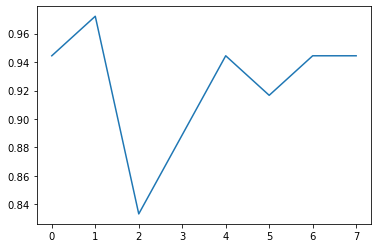

In [9]:
# 7) trees tuning
params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"]
}

y_plot = []
for config in ParameterGrid(params):
    print("CURRENT CONFIG: ", config)
    model = DecisionTreeClassifier(splitter=config["splitter"], max_depth=config["max_depth"])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    y_plot.append(accuracy_score(y_test, y_pred))
plt.figure(1)
plt.plot([ i for i in range(len(y_plot))], y_plot)
plt.show()

In [10]:
# 8) k-fold cross validation
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2)
kf = KFold(5) # 5-fold cross validation
best_config = None
max_acc = None
for config in ParameterGrid(params):
    acc_score = 0
    n = 0
    for train_indices, validation_indices in kf.split(X_train_valid):
        X_train = X_train_valid[train_indices]
        X_valid = X_train_valid[validation_indices]
        y_train = y_train_valid[train_indices]
        y_valid = y_train_valid[validation_indices]
        model = DecisionTreeClassifier(splitter=config["splitter"], max_depth=config["max_depth"])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        acc_score += accuracy_score(y_valid, y_pred)
        n += 1
    acc_score /= n
    if best_config == None or acc_score > max_acc:
        best_config = config
        max_acc = acc_score

In [11]:
# 8) final tree
model = DecisionTreeClassifier(splitter=best_config["splitter"], max_depth=best_config["max_depth"])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9166666666666666


In [ ]:
# pre-order traversal values (infisso)
features = model.tree_.feature
impurities = model.tree_.impurity

def left(i):
    return i*2

def right(i):
    return i*2+1